In [18]:
from sklearn.datasets import load_digits
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import homogeneity_score, silhouette_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import product

In [19]:
iris = datasets.load_iris()

y = iris.target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [20]:
X = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
# Подберите параметр n_clusters. Объясните почему вы выбрали именно то число, которое поставили. Это важно!
km = KMeans(n_clusters=3, random_state=3)
km.fit_transform(X)



C:\Users\Илья\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[0.14135063, 3.41925061, 5.0595416 ],
       [0.44763825, 3.39857426, 5.11494335],
       [0.4171091 , 3.56935666, 5.27935534],
       [0.52533799, 3.42240962, 5.15358977],
       [0.18862662, 3.46726403, 5.10433388],
       [0.67703767, 3.14673162, 4.68148797],
       [0.4151867 , 3.51650264, 5.21147652],
       [0.06618157, 3.33654987, 5.00252706],
       [0.80745278, 3.57233779, 5.32798107],
       [0.37627118, 3.3583767 , 5.06790865],
       [0.4824728 , 3.32449131, 4.89806763],
       [0.25373214, 3.31126872, 4.9966845 ],
       [0.50077939, 3.46661272, 5.19103612],
       [0.91322505, 3.90578362, 5.65173594],
       [1.01409073, 3.646649  , 5.10804455],
       [1.20481534, 3.49427881, 4.88564095],
       [0.6542018 , 3.495248  , 5.03090587],
       [0.1441527 , 3.38444981, 5.02342022],
       [0.82436642, 3.11245944, 4.61792995],
       [0.38933276, 3.37738931, 4.97213426],
       [0.46344363, 3.07471224, 4.6955761 ],
       [0.3286031 , 3.31506588, 4.9236821 ],
       [0.

In [22]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [23]:
confusion_matrix(y_true=y, y_pred=km.labels_)
# должна быть возможность строки переставить таким образом,
# чтобы на главной диагонали стояли максимальные элементы
# Объясните почему? Изучите confusion_matrix

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [24]:
# Оцените гомогенность по предсказанным и фактическим меткам
# Изучите этот показатель
homogeneity_score(y, km.labels_)

0.7514854021988338

In [25]:
# Оцените силуэт по Вашим предсказанным меткам
silhouette_score(X, km.labels_)

0.5528190123564094

In [26]:
# Оцените силуэт по данным из load_iris
silhouette_score(iris['data'], y)

0.503477440693296

In [27]:
# Сгенерируйте рандомный датасет с размером len(y) с метками от 0 до 2 включительно. Цисла целые.
# Оцените Ваши рандомные метки с помощью homogenity_score

y_true = np.random.randint(0, 3, size=100)
y_pred = np.random.randint(0, 3, size=100)

score = homogeneity_score(y_true, y_pred)
print("Homogeneity Score:", score)

Homogeneity Score: 0.037706356397658194


In [28]:
# Обучение дерева решений
dtc = DecisionTreeClassifier(random_state=10)
dtc.fit(iris['data'], y)


DecisionTreeClassifier(random_state=10)

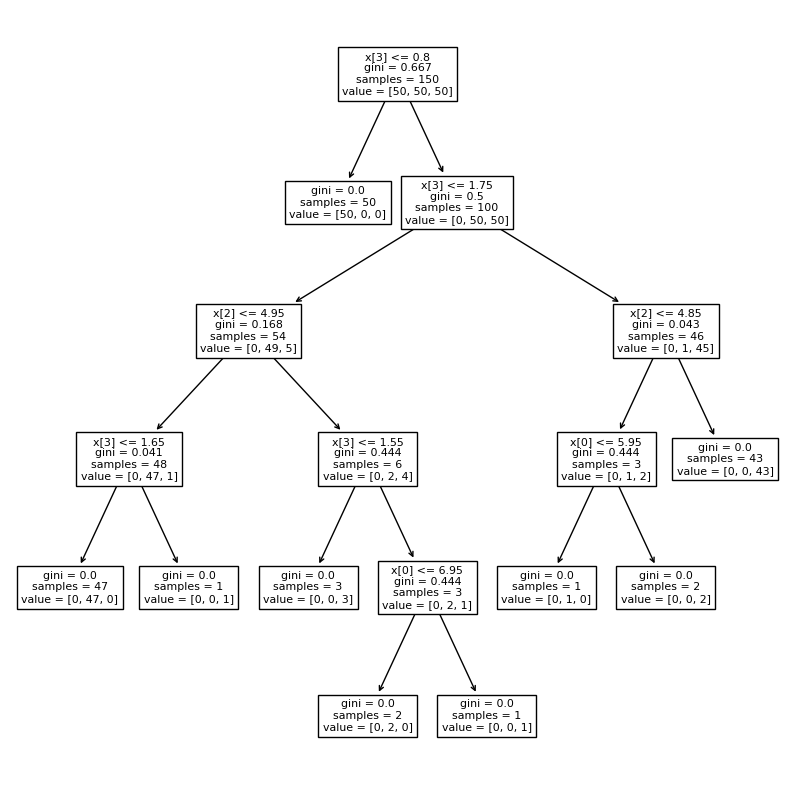

In [29]:
plt.figure(figsize=(10, 10))
plot_tree(dtc)
plt.show()

In [35]:
# Оцените гомогенность и силуэт на алгоритме KMeans, меняя количество n_clusters от 2 до 15
metrics_data = []
for n in range(2, 16):
  km = KMeans(n_clusters=n, random_state=3)
  # Код для обучения km
  km.fit_transform(X)
  h_score = homogeneity_score(y, km.labels_)
  s_score = silhouette_score(X=X, labels=km.labels_)
  metrics_data.append({"n": n,
                       "homogeneity_score": h_score,
                       "silhouette_score": s_score})

C:\Users\Илья\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Илья\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Илья\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Илья\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

<Axes: xlabel='n'>

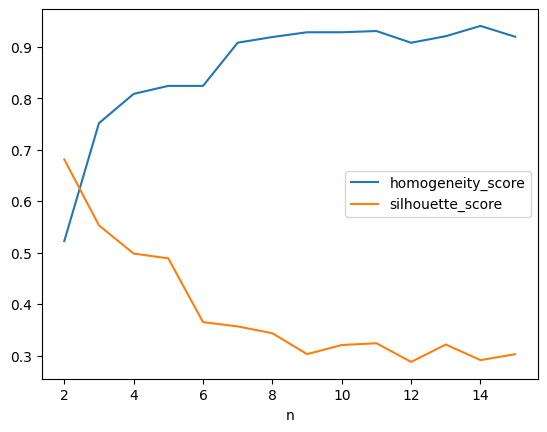

In [36]:
pd.DataFrame(metrics_data).plot(x="n",
                                y=["homogeneity_score", "silhouette_score"])

In [37]:
# Дополнительно, продемонстрируйте функционал функции product
for eps, min_samples, metric in product([0.1, 0.2, 0.3, 0.5, 1, 2, 3],
                                        [1, 2, 5, 10],
                                        ["euclidean", "cosine", "manhattan"]):
  dbs = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
  dbs = dbs.fit(X)
  y_pred = list(dbs.labels_)
  if -1 in y_pred:
    n_cluster = len(set(y_pred)) - 1
  else:
    n_cluster = len(set(y_pred))
  if n_cluster == 3:
    # Выводим параметры модели, при которых модель показывает верное количество кластеров
    print(f'EPS: {eps}, min_samples: {min_samples}, metric: {metric}')


EPS: 0.3, min_samples: 5, metric: euclidean
EPS: 0.3, min_samples: 5, metric: manhattan
EPS: 0.5, min_samples: 5, metric: manhattan
EPS: 1, min_samples: 2, metric: manhattan


In [38]:
# Используя данные параметры обучите модель dbscan. Вычислите силуэт и гомогенность
dbs = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
dbs = dbs.fit(X)
y_pred = dbs.labels_
print('silhouette_score:', silhouette_score(X, y_pred))
print('homogeneity_score:', homogeneity_score(y, y_pred))

silhouette_score: -0.052064296410955904
homogeneity_score: 0.4076549670760289


In [41]:
digits = load_digits()

X = digits.data
y = digits.target

In [46]:
# Понижаем размерность с помощью kmeans
km_digits = KMeans(n_clusters = 2, random_state=10, n_init="auto")

reduced_dims_kmeans_xy = km_digits.fit_transform(X)

reduced_dims_kmeans = pd.DataFrame(reduced_dims_kmeans_xy, columns=["x", "y"])
# Добавьте поле digit в датафрейм, чтобы получился как ниже
reduced_dims_kmeans["digit"] = digits.target

In [47]:
reduced_dims_kmeans

,x,y,digit
0,38.177585,29.391364,0
1,29.661828,39.954588,1
2,35.403762,39.586711,2
3,38.940928,27.474431,3
4,37.587788,43.051234,4
...,...,...,...
1792,37.924196,28.211100,9
1793,40.422256,34.841406,0
1794,31.297412,35.589725,8
1795,36.421096,29.311553,9


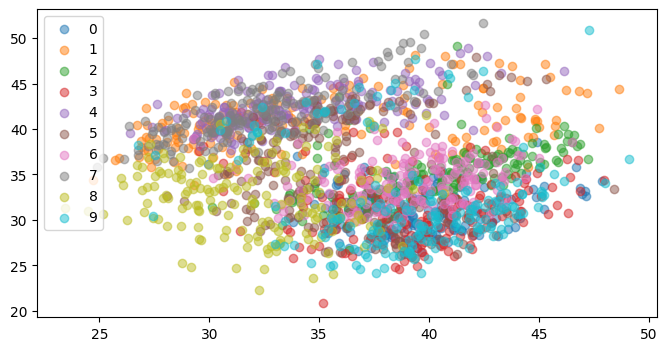

In [48]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,4))
for digit, digit_subset in reduced_dims_kmeans.groupby("digit"):
  ax.scatter(digit_subset["x"], digit_subset["y"], label=digit, alpha=0.5)
ax.legend()

In [49]:
#Найдем ее. У этой точки значение digit == 9, а y > 50 (посмотрите на график выше и убедитесь)
i_outlier_9 = np.where((reduced_dims_kmeans["digit"] == 9) & (reduced_dims_kmeans["y"] > 50))

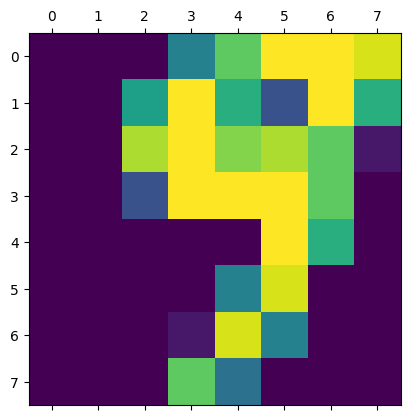

In [50]:
plt.matshow(digits.images[i_outlier_9[0][0]])

In [60]:
# Теперь попытаемся найти точку, которая максимально похожа на 9-ку
# Вычисляем расстояние
reduced_dims_kmeans["dist"] = np.sqrt(reduced_dims_kmeans["x"]**2 + reduced_dims_kmeans["y"]**2)


# Отфильтруйте таблицу, чтобы остались только строки, относящиеся к 9. Найдите топ 10 строк, которые больше всего похожи на 9-ку
# Руководтсвуйтесь полученным расстоянием
digit_9_subset = reduced_dims_kmeans[reduced_dims_kmeans["digit"] == 9]
digit_9_subset.nsmallest(10, "dist")

,x,y,digit,dist
547,27.418020,30.417406,9,40.950781
459,34.631873,25.227849,9,42.846365
254,33.004284,27.348119,9,42.862599
293,33.400757,27.141448,9,43.037993
1058,35.511448,24.957405,9,43.404320
1658,33.848709,27.209106,9,43.428914
478,35.643629,25.042040,9,43.561130
514,36.843664,24.627136,9,44.316491
505,36.677092,25.046942,9,44.413493
405,37.605211,24.187649,9,44.712350


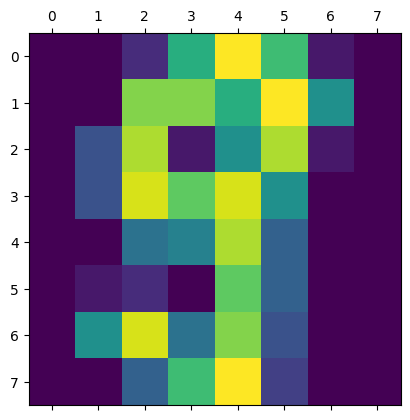

In [80]:
# Поставьте сюда индекс строки, которая больше всего похожа на цифру 9 (руководствуйтесь таблицей выше)
plt.matshow(digits.images[547])

In [83]:
# Вместо KMeans используйте метод главных компонент (PCA)
X_reduced = PCA(n_components=2).fit_transform(X)

X_reduced_df = pd.DataFrame(X_reduced, columns=["x", "y"])
# Добавьте поле digit в датафрейм, чтобы получился как ниже
X_reduced_df["digit"] = digits.target

In [84]:
X_reduced_df

,x,y,digit
0,-1.259464,21.274884,0
1,7.957614,-20.768698,1
2,6.991919,-9.955987,2
3,-15.906102,3.332464,3
4,23.306866,4.269063,4
...,...,...,...
1792,-14.606627,13.344124,9
1793,6.464570,20.567300,0
1794,10.801283,-6.960255,8
1795,-4.872100,12.423958,9


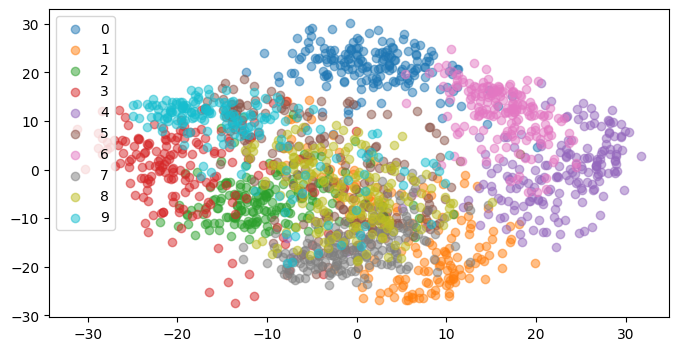

In [85]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,4))
for digit, digit_subset in X_reduced_df.groupby("digit"):
  ax.scatter(digit_subset["x"], digit_subset["y"], label=digit, alpha=0.5)
ax.legend()

In [98]:
dbscan_params = []
for eps, min_samples, metric in product([0.025, 0.05, 0.075],
                                        [1, 2, 5, 10, 50, 100],
                                        ["euclidean", "cosine", "manhattan"]):
    # С помощью примеров выше, найдите оптимальный параметры для DBSCAN.
    # Количество n_samples - равняется количеству кластеров. В нашем случае = 10 цифрам (0,1,...,9)
  dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
  clusters = dbscan.fit_predict(X)
  num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    
  if num_clusters == 10:
      dbscan_params.append((eps, min_samples, metric))

print("Оптимальные DBSCAN параметры:")
for eps, min_samples, metric in dbscan_params:
    print(f"eps={eps}, min_samples={min_samples}, metric={metric}")
    

Оптимальный DBSCAN Параметры:
eps=0.075, min_samples=2, metric=cosine
